In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def percents(xs):
  res = [(xs[i + 1] - xs[i]) / xs[i] * 100 for i in range(len(xs) - 1)]
  res.insert(0, 0)
  return res

def load(f, pth='evaluation'):
  return np.load(f'{pth}/{f}', allow_pickle=True).item()

A1 = load('A1.npy')
A2 = load('A2.npy')
A3 = load('A3.npy')
A5 = load('A5.npy')
A7 = load('A7.npy')
A10 = load('A10.npy')

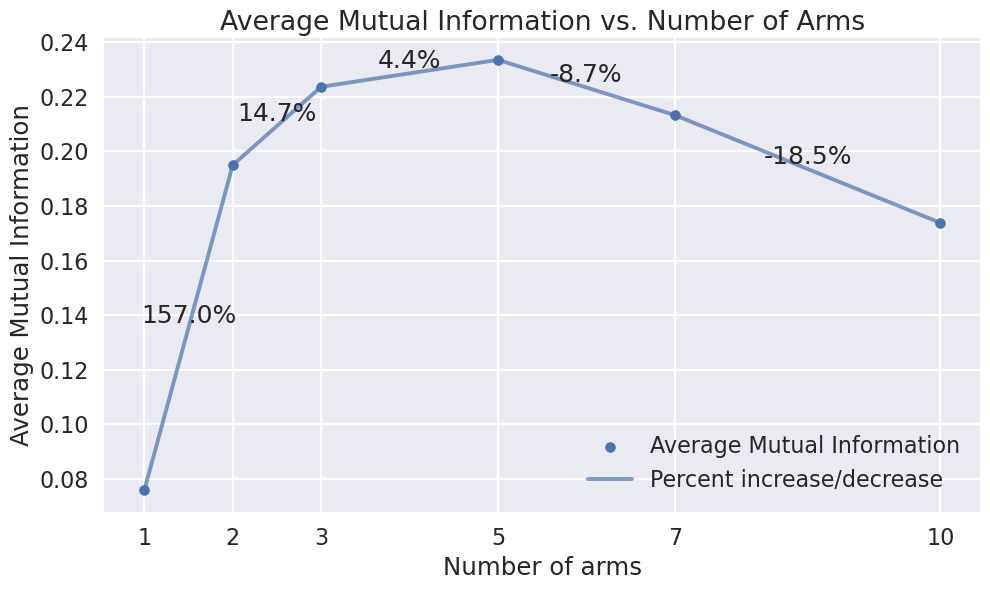

In [58]:
# Sample data
mis = [x['avg_mi'] for x in [A1, A2, A3, A5, A7, A10]]
x = [1, 2, 3, 5, 7, 10]

# Calculate percent changes
percent_changes = percents(mis)

plt.style.use('seaborn-v0_8-poster')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data points and line
scatter = ax.scatter(x, mis, s=50, zorder=3, label='Average Mutual Information')
line = ax.plot(x, mis, alpha=0.7, zorder=2, label='Percent increase/decrease')[0]

# Add percent increase labels
for i in range(1, len(x)):
    mid_x = (x[i-1] + x[i]) / 2
    mid_y = (mis[i-1] + mis[i]) / 2
    ax.text(mid_x, mid_y, f'{percent_changes[i]:.1f}%', 
            ha='center', va='bottom', fontsize=18)

# Set labels and title
ax.set_xlabel('Number of arms')
ax.set_ylabel('Average Mutual Information')
ax.set_title('Average Mutual Information vs. Number of Arms')

# Customize x-axis ticks
ax.set_xticks(x)
ax.set_xticklabels(x)

# Add legend
ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()